### Compute bigram statistics over all fasta entries (irrespective of organism, etc.)

In [2]:
import torch

def draw_bigram(bigram: torch.tensor, itot, ttoi, decimal_points=0): 
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(16,16))
    plt.imshow(bigram, cmap='Blues')

    for i in range(27):
        for j in range(27):
            chstr = itot[i] + itot[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            formatting_text = ("{:." + str(decimal_points) + "f}").format(bigram[i, j].item()) if decimal_points > 0 else int(bigram[i, j].item())
            plt.text(j, i, formatting_text, ha="center", va="top", color='gray')
    plt.axis('off');

/Users/timon/.pyenv/versions/3.10.2/envs/proteyn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from main import run_pipeline, get_token_idx_map, TOKENS, get_entries_from_fasta, calc_bigram_counts_no_prior, get_probs_from_counts

# read all uniref entries into array
entries = get_entries_from_fasta(path='data/train.fasta')

# build index maps for tokens
ttoi, itot = get_token_idx_map(TOKENS)

# build bigram
bigram_counts = calc_bigram_counts_no_prior(entries, ttoi, TOKENS)
bigram_probs = get_probs_from_counts(bigram_counts)

In [8]:
# save bigram counts as prior for later fine tuning
torch.save(bigram_counts, "example_prior.pt")

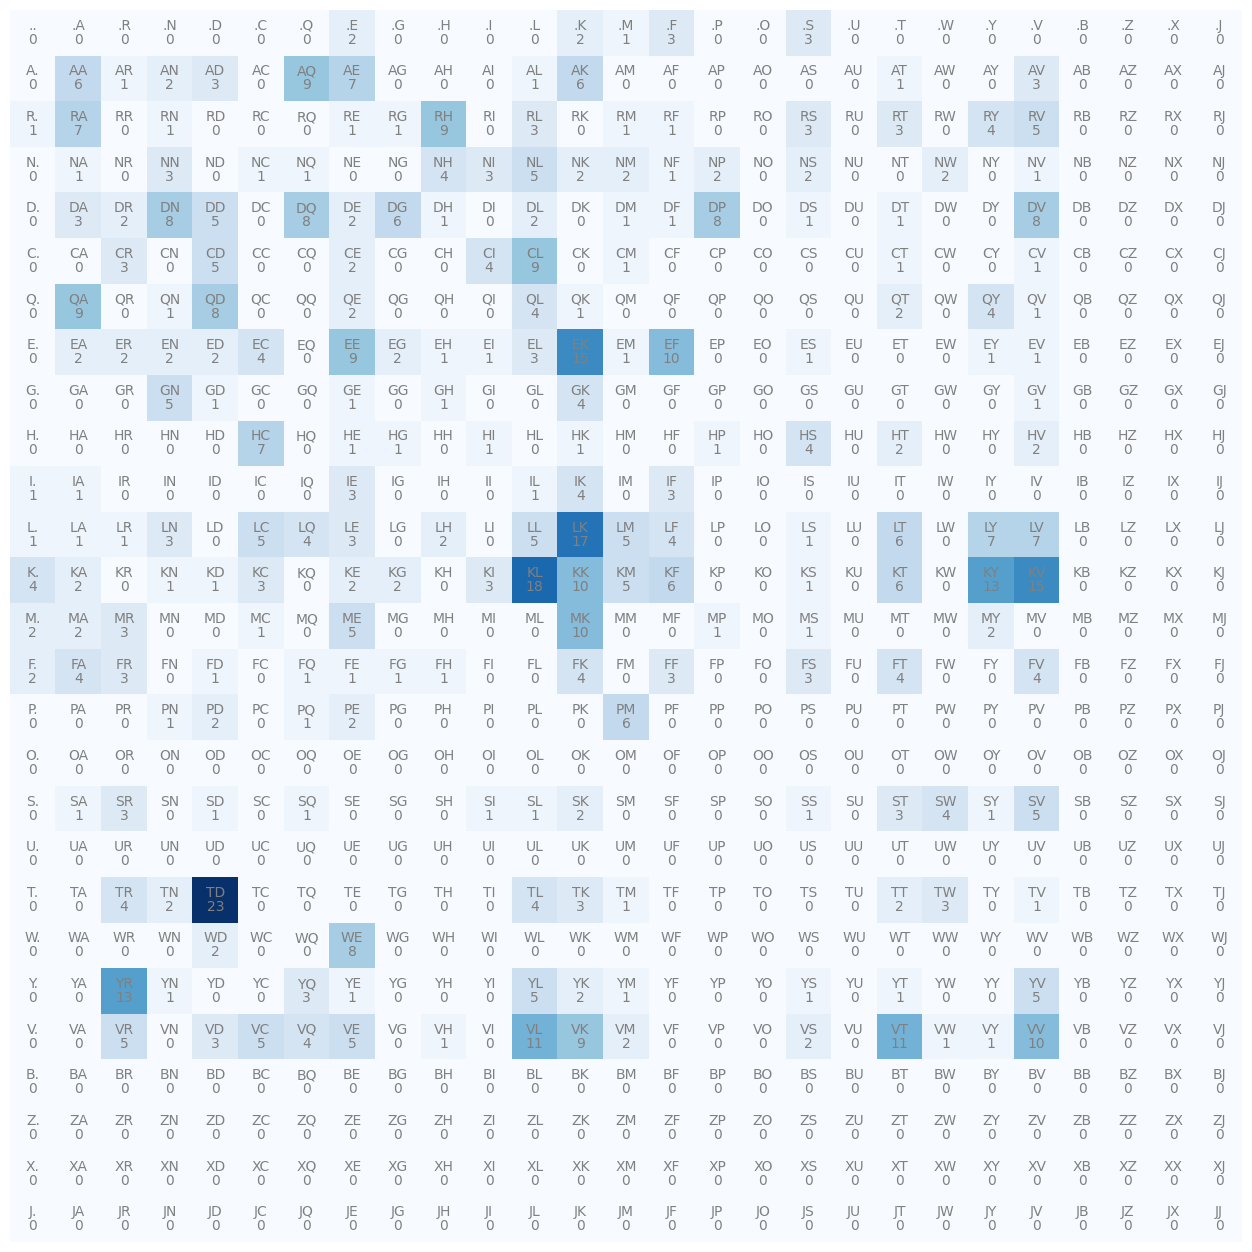

In [ ]:
draw_bigram(bigram_counts, itot=itot, ttoi=ttoi, decimal_points=0)

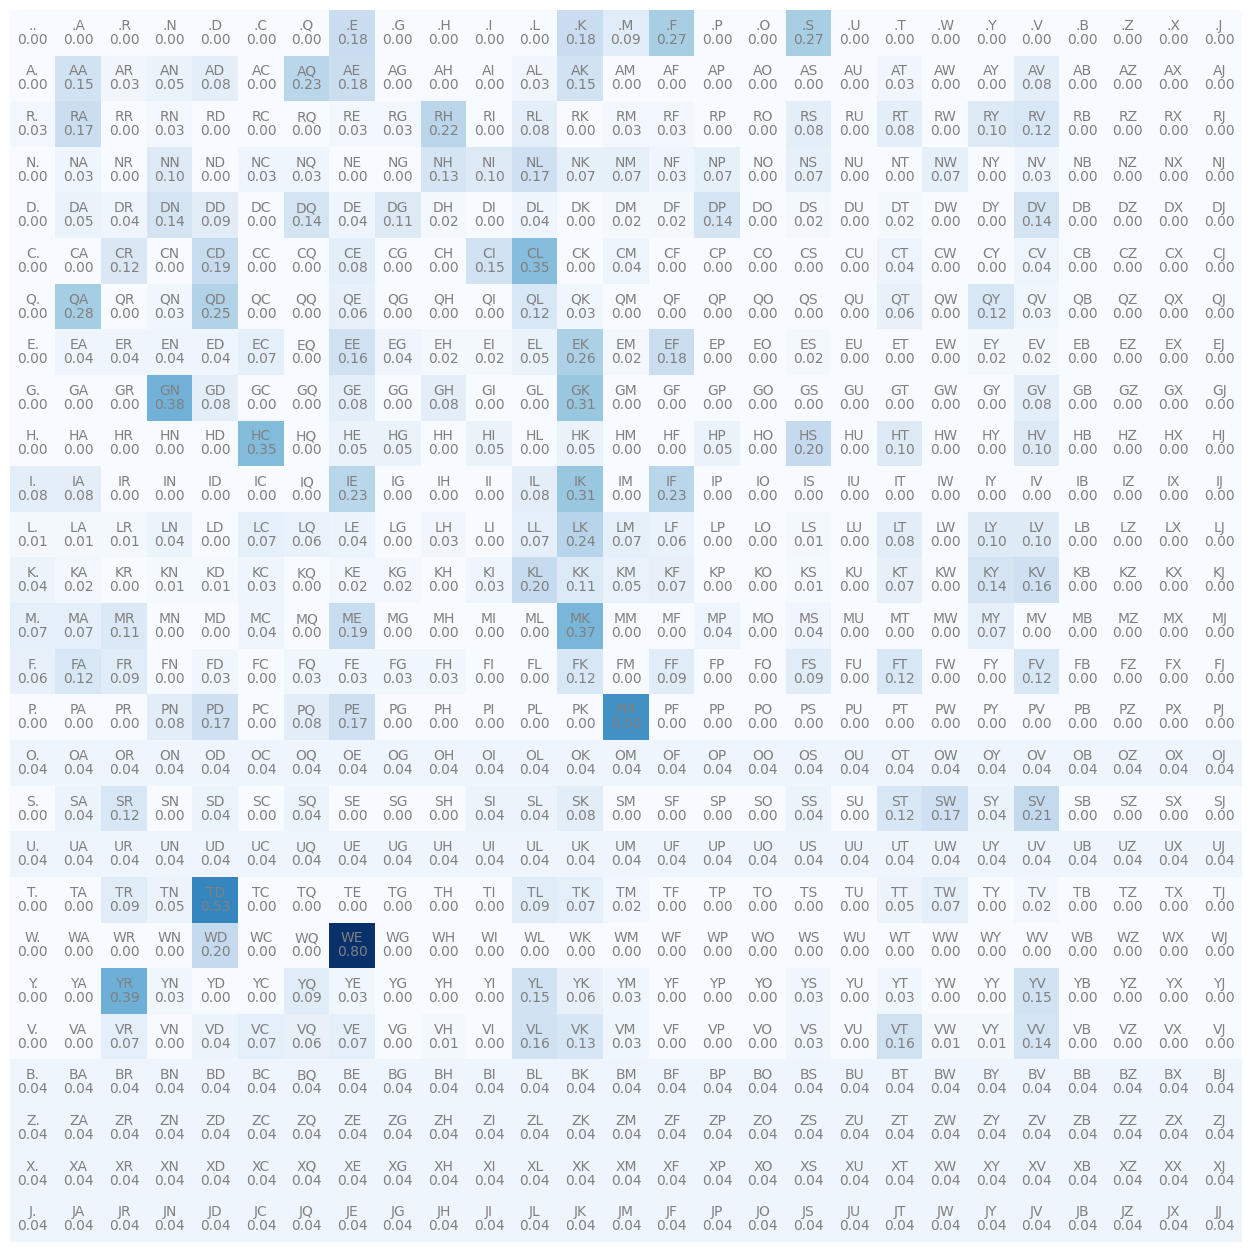

In [ ]:
draw_bigram(bigram_probs, itot=itot, ttoi=ttoi, decimal_points=2)